# Lab 10: Local Models

## SOM

In [1]:
from minisom import MiniSom   
data = [[ 0.80,  0.55,  0.22,  0.03],
        [ 0.82,  0.50,  0.23,  0.03],
        [ 0.80,  0.54,  0.22,  0.03],
        [ 0.80,  0.53,  0.26,  0.03],
        [ 0.79,  0.56,  0.22,  0.03],
        [ 0.75,  0.60,  0.25,  0.03],
        [ 0.77,  0.59,  0.22,  0.03]]    

som = MiniSom(6, 6, 4, sigma=0.5, learning_rate=0.5)
som.train_random(data, 100)

Training...
 [  553 / 1000 ]  55% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.014785493983449272

...ready!


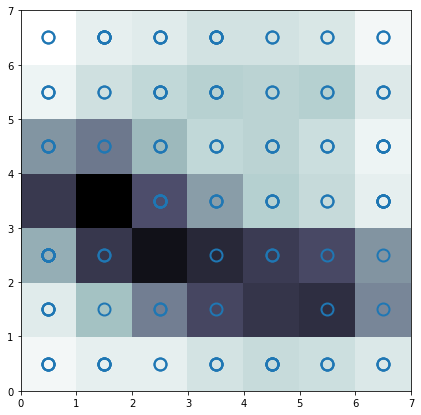

In [2]:
from minisom import MiniSom
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

data = np.genfromtxt('https://book.phylolab.net/machine_learning_data/iris.csv', delimiter=',', usecols=(0, 1, 2, 3))
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)

# Initialization and training
som = MiniSom(7, 7, 4, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)

som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 1000, verbose=True)  # random training
print("\n...ready!")

plt.figure(figsize=(7, 7))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

target = np.genfromtxt('https://book.phylolab.net/machine_learning_data/iris.csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 7, 0, 7])
plt.show()